# Análise de Produções Acadêmicas

Este notebook realiza uma análise exploratória de um conjunto de dados sobre produções acadêmicas, considerando aspectos temporais, institucionais e textuais.

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

## Carregamento do dataset

In [2]:
df = pd.read_csv(
    'dataset.csv',
    engine='python',
    on_bad_lines='skip'
)

df.head()

,Autor(a),ID Lattes do(a) autor(a),Orientadores,ID Lattes dos orientadores,Membros da banca,ID Lattes dos membros da banca,Título,Ano de defesa,Instituição de defesa,Sigla da instituição de defesa,...,Tipo de documento,Assuntos em português,Assuntos em inglês,Idioma,Resumo,Link de acesso,Identificador persistente ARK,Resumo em Português,Resumo em Inglês,Referência Bibliográfica
0,"Bastos, F. J. dos S.",Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,A influência do uso da inteligência artificial...,2025,Centro Universitário da Fundação Educacional I...,FEI,...,masterThesis,Educação||Inteligência artificial||Finanças,Não informado pela instituição,por||pt_BR,A presente dissertação tem como objetivo inves...,"BASTOS, F. J. dos S. <b> A influência do uso d...",Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,Não informado pela instituição
1,"AURELIANO, Viviane Cristina Oliveira",Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,Stepwise self-explanation: uma abordagem para ...,2016,Universidade Federal de Pernambuco (UFPE),UFPE,...,doctoralThesis,Inteligência artificial||Educação||Tecnologia ...,Não informado pela instituição,por,Começar a programar é considerado difícil pela...,https://repositorio.ufpe.br/handle/123456789/2...,ark:/64986/00130000136r7,Não informado pela instituição,Não informado pela instituição,Não informado pela instituição
2,"Jess, Gil Marcos",Não informado pela instituição,"Carvalho, Alexandre Luis Trovon de, 1968-||Não...",Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,Inteligência artificial e tecnologias da intel...,2004,Universidade Federal do Paraná (UFPR),UFPR,...,masterThesis,Inteligência artificial||Raciocínio||Dissertaç...,Não informado pela instituição,por,Anexos,https://hdl.handle.net/1884/32969,Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,Não informado pela instituição
3,"Baur, Katharina Tameirão",Não informado pela instituição,"Canôas, Silvia Swain||Não informado pela insti...",Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,ChatGPT e o ensino da Matemática: crenças dos ...,2024,Universidade Federal dos Vales do Jequitinhonh...,UFVJM,...,doctoralThesis,Educação||Matemática||Tecnologias||Inteligênci...,Education||Mathematics||Technologies||Artifici...,por,O presente trabalho foi realizado com apoio da...,http://localhost:4000/handle/123456789/3754,Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,"BAUR, Katharina Tameirão. ChatGPT e o ensino d..."
4,"Domeneghini, Daiana",Não informado pela instituição,"Pescador, Cristina Maria||Não informado pela i...",Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,A inteligência artificial como prática mediado...,2022,Universidade de Caxias do Sul (UCS),UCS,...,masterThesis,Educação||Inteligência artificial||Aprendizage...,Education||Artificial intelligence||Learning||...,eng||por,A pesquisa versa sobre a inserção das técnicas...,https://repositorio.ucs.br/11338/10684,Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,Não informado pela instituição


## Visão geral dos dados

In [3]:
df.shape

(158, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Autor(a)                                            158 non-null    object
 1   ID Lattes do(a) autor(a)                            158 non-null    object
 2   Orientadores                                        158 non-null    object
 3   ID Lattes dos orientadores                          158 non-null    object
 4   Membros da banca                                    158 non-null    object
 5   ID Lattes dos membros da banca                      158 non-null    object
 6   Título                                              158 non-null    object
 7   Ano de defesa                                       158 non-null    int64 
 8   Instituição de defesa                               158 non-null    object
 9   Sigla da i

In [5]:
df.describe(include='object')

,Autor(a),ID Lattes do(a) autor(a),Orientadores,ID Lattes dos orientadores,Membros da banca,ID Lattes dos membros da banca,Título,Instituição de defesa,Sigla da instituição de defesa,País da instituição de defesa,...,Tipo de documento,Assuntos em português,Assuntos em inglês,Idioma,Resumo,Link de acesso,Identificador persistente ARK,Resumo em Português,Resumo em Inglês,Referência Bibliográfica
count,158,158,158,158,158,158,158,158,158,158,...,158,158,158,158,158,158,158,158,158,158
unique,152,23,62,17,10,5,152,48,48,4,...,2,143,40,5,148,158,14,1,1,34
top,"TEIXEIRA, Luciênio de Macêdo.",Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,Da representação do conhecimento musical ao es...,Universidade Federal do Rio Grande do Sul (UFRGS),UFRGS,Não informado pela instituição,...,masterThesis,Não informado pela instituição,Não informado pela instituição,por,Dissertação (mestrado) - Universidade Federal ...,"BASTOS, F. J. dos S. <b> A influência do uso d...",Não informado pela instituição,Não informado pela instituição,Não informado pela instituição,Não informado pela instituição
freq,2,136,86,137,149,154,2,19,19,133,...,100,10,119,145,2,1,145,158,158,125


## Limpeza e tratamento inicial

In [6]:
df.replace('Não informado pela instituição', np.nan, inplace=True)

df.isnull().sum().sort_values(ascending=False)

/tmp/ipython-input-4234322485.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('Não informado pela instituição', np.nan, inplace=True)


,0
Resumo em Português,158
Resumo em Inglês,158
ID Lattes dos membros da banca,154
Membros da banca,149
Identificador persistente ARK,145
ID Lattes dos orientadores,137
Departamento da instituição de defesa,136
ID Lattes do(a) autor(a),136
País da instituição de defesa,133
Programa de Pós-Graduação da instituição de defesa,130


## Análises exploratórias

### Produções por ano

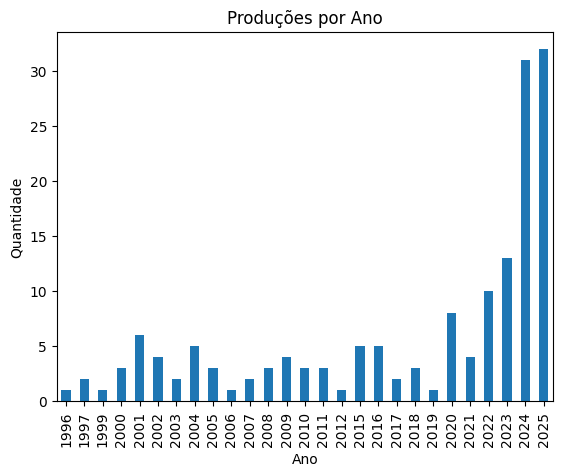

In [7]:
df['Ano de defesa'].value_counts().sort_index().plot(kind='bar')
plt.title('Produções por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show()

### Instituições com mais trabalhos

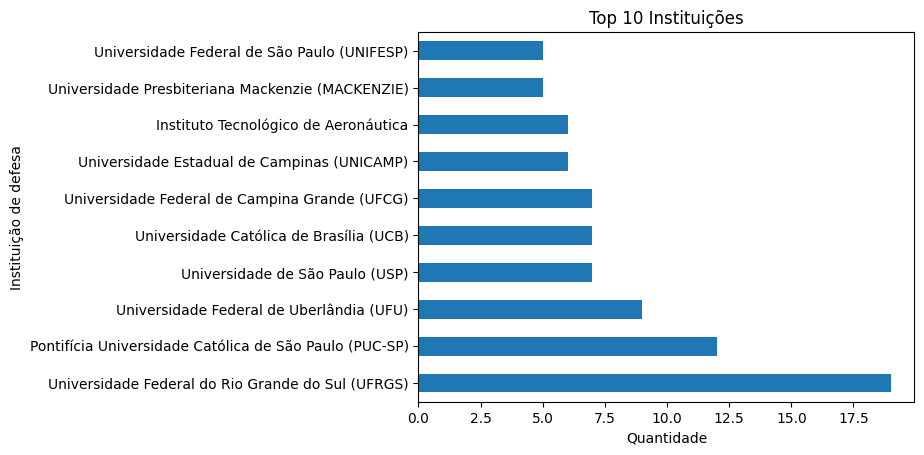

In [8]:
df['Instituição de defesa'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Instituições')
plt.xlabel('Quantidade')
plt.show()

### Orientadores mais frequentes

In [9]:
df['Orientadores'].value_counts().head(10)

,count
Orientadores,
"Vicari, Rosa Maria||Não informado pela instituição",6
"Kaufman, Dora||Não informado pela instituição",3
"Silveira, Ismar Frango||Não informado pela instituição",2
"Mattar Neto, João Augusto||Não informado pela instituição",2
"SILVA, João de Deus Mendes da||Não informado pela instituição",2
"Mustaro, Pollyana Notargiacomo||Não informado pela instituição",2
"Giraffa, Lucia Maria Martins||Não informado pela instituição",1
"Barreto, Jorge Muniz||Não informado pela instituição",1
Amaury Antonio de Castro Junior||Não informado pela instituição,1


## Análise textual

Proporção de Teses e Dissertações

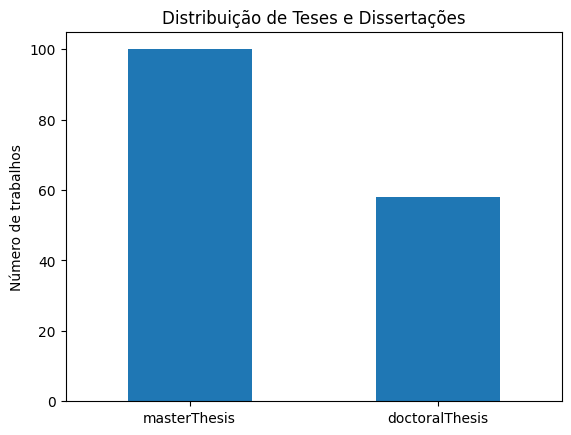

In [10]:
df['Tipo de documento'].value_counts().plot(kind='bar')
plt.title('Distribuição de Teses e Dissertações')
plt.xlabel('')
plt.ylabel('Número de trabalhos')
plt.xticks(rotation=0)
plt.show()


Evolução Teses e Dissertações por Ano

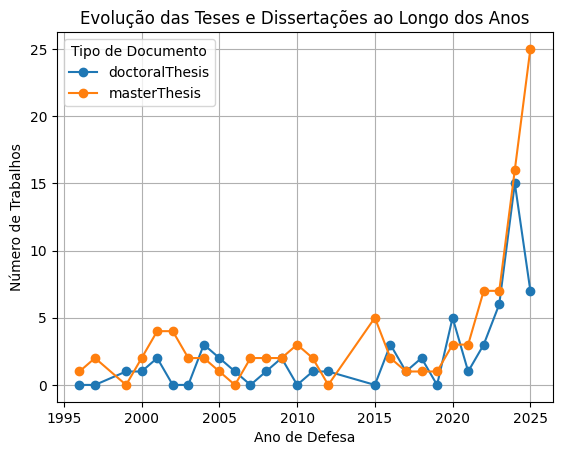

In [11]:
df_linha = (
    df.groupby(['Ano de defesa', 'Tipo de documento'])
      .size()
      .unstack(fill_value=0)
      .sort_index()
)

df_linha.plot(kind='line', marker='o')
plt.title('Evolução das Teses e Dissertações ao Longo dos Anos')
plt.xlabel('Ano de Defesa')
plt.ylabel('Número de Trabalhos')
plt.legend(title='Tipo de Documento')
plt.grid(True)
plt.show()


Palavras Recorrentes no Título

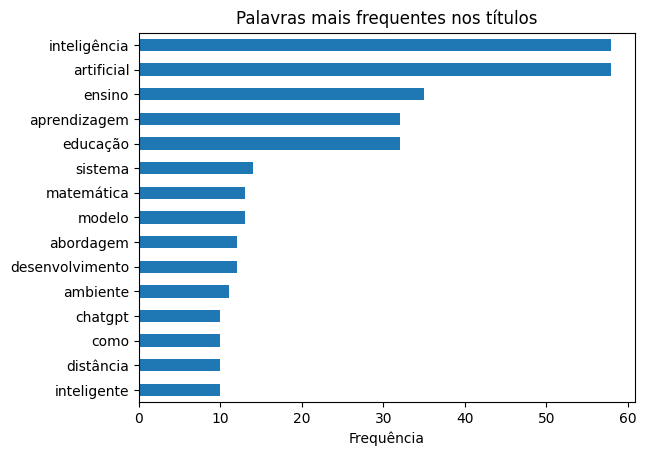

In [12]:
from collections import Counter
import re

# Junta todos os títulos em um único texto
titulos = ' '.join(df['Título'].dropna()).lower()

# Remove pontuação
titulos = re.sub(r'[^\w\s]', '', titulos)

# Separa em palavras
palavras = titulos.split()

# Remove palavras muito comuns (stopwords simples)
stopwords = {
    'de', 'da', 'do', 'das', 'dos', 'e', 'em', 'para', 'com',
    'uma', 'um', 'no', 'na', 'nos', 'nas', 'sobre'
}

palavras_filtradas = [p for p in palavras if p not in stopwords and len(p) > 3]

# Conta as palavras
contagem = Counter(palavras_filtradas).most_common(15)

# Converte para DataFrame
df_palavras = pd.DataFrame(contagem, columns=['Palavra', 'Frequência'])

# Plota
df_palavras.plot(kind='barh', x='Palavra', y='Frequência', legend=False)
plt.title('Palavras mais frequentes nos títulos')
plt.xlabel('Frequência')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()


In [13]:
from collections import Counter
import re

# Texto dos títulos
texto = ' '.join(df['Título'].dropna()).lower()

# Remove pontuação
texto = re.sub(r'[^\w\s]', '', texto)

# Stopwords básicas
stopwords = {
    'de', 'da', 'do', 'das', 'dos', 'e', 'em', 'para', 'com',
    'uma', 'um', 'no', 'na', 'nos', 'nas', 'sobre'
}

# Palavras filtradas
palavras = [p for p in texto.split() if p not in stopwords]

def gerar_ngrams(lista, n):
    return zip(*[lista[i:] for i in range(n)])

# Coleta n-gramas de 2 a 5 palavras
frases = []
for n in range(2, 6):
    frases.extend([' '.join(ng) for ng in gerar_ngrams(palavras, n)])

# Conta frequência
frases_comuns = Counter(frases).most_common(20)

frases_comuns


[('inteligência artificial', 55),
 ('a distância', 10),
 ('o ensino', 8),
 ('a inteligência', 7),
 ('a inteligência artificial', 7),
 ('ensino aprendizagem', 6),
 ('ensino a', 6),
 ('ensino a distância', 6),
 ('uso inteligência', 5),
 ('a educação', 5),
 ('sistema tutor', 5),
 ('chatgpt como', 5),
 ('artificial generativa', 5),
 ('ensino médio', 5),
 ('a construção', 5),
 ('uso inteligência artificial', 5),
 ('inteligência artificial generativa', 5),
 ('objetos aprendizagem', 4),
 ('como recurso', 4),
 ('o uso', 4)]

Palavras Recorrentes no Resumo

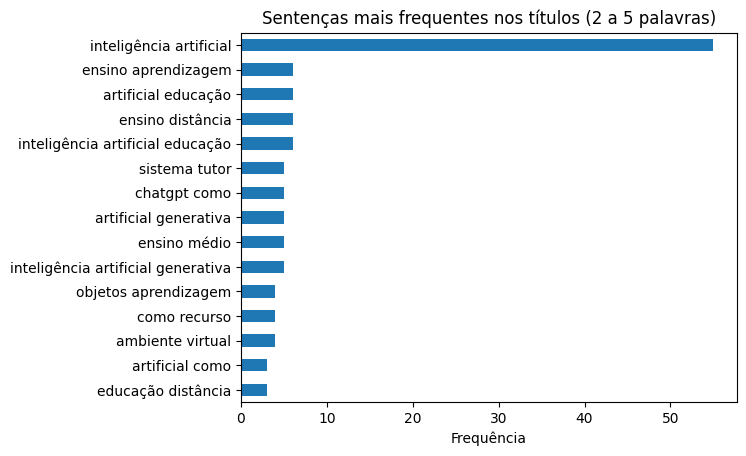

In [14]:
from collections import Counter
import re

# Junta todos os títulos
titulos = ' '.join(df['Título'].dropna()).lower()

# Remove pontuação
titulos = re.sub(r'[^\w\s]', '', titulos)

# Separa em palavras
palavras = titulos.split()

# Stopwords simples
stopwords = {
    'de', 'da', 'do', 'das', 'dos', 'e', 'em', 'para', 'com',
    'uma', 'um', 'no', 'na', 'nos', 'nas', 'sobre'
}

palavras_filtradas = [p for p in palavras if p not in stopwords and len(p) > 3]

# Função para gerar n-gramas
def gerar_ngrams(lista, n):
    return zip(*[lista[i:] for i in range(n)])

# Gera sentenças de 2 a 5 palavras
sentencas = []
for n in range(2, 6):
    sentencas.extend([' '.join(ng) for ng in gerar_ngrams(palavras_filtradas, n)])

# Conta as sentenças
contagem = Counter(sentencas).most_common(15)

# Converte para DataFrame
df_sentencas = pd.DataFrame(contagem, columns=['Sentença', 'Frequência'])

# Plota
df_sentencas.plot(kind='barh', x='Sentença', y='Frequência', legend=False)
plt.title('Sentenças mais frequentes nos títulos (2 a 5 palavras)')
plt.xlabel('Frequência')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.show()


In [15]:
from collections import Counter
import re

stopwords = {
    'de', 'da', 'do', 'das', 'dos', 'e', 'em', 'para', 'com',
    'uma', 'um', 'no', 'na', 'nos', 'nas', 'sobre'
}

def limpar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    return [p for p in texto.split() if p not in stopwords]

def gerar_ngrams(lista, n):
    return zip(*[lista[i:] for i in range(n)])

frases = []

for titulo in df['Título'].dropna():
    palavras = limpar_texto(titulo)
    for n in range(2, 6):
        frases.extend([' '.join(ng) for ng in gerar_ngrams(palavras, n)])

frases_comuns = Counter(frases).most_common(20)
frases_comuns


[('inteligência artificial', 55),
 ('a distância', 10),
 ('o ensino', 8),
 ('a inteligência', 7),
 ('a inteligência artificial', 7),
 ('ensino aprendizagem', 6),
 ('ensino a', 6),
 ('ensino a distância', 6),
 ('uso inteligência', 5),
 ('uso inteligência artificial', 5),
 ('a educação', 5),
 ('sistema tutor', 5),
 ('chatgpt como', 5),
 ('artificial generativa', 5),
 ('inteligência artificial generativa', 5),
 ('ensino médio', 5),
 ('a construção', 5),
 ('objetos aprendizagem', 4),
 ('como recurso', 4),
 ('o uso', 4)]